### Data Path

In [1]:
DATA_PATH = "../Dataset/Processed/adultExplored.csv"
EXPORT_PATH = "../Dataset/Processed/adultProcessed.csv"

### Import Helper Library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_pickle(DATA_PATH)
df.shape

(32561, 15)

In [4]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.duplicated().sum()

np.int64(24)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.reset_index(drop=True, inplace=True)

- Also there is an "?" in the column workcalss so we will replace all '?' entries with proper NaN values

In [10]:
df.replace('?', np.nan, inplace=True)

In [11]:
df.isnull().mean()*100

age               0.000000
workclass         5.642807
fnlwgt            0.000000
education         0.000000
education_num     0.000000
marital_status    0.000000
occupation        5.664321
relationship      0.000000
race              0.000000
sex               0.000000
capital_gain      0.000000
capital_loss      0.000000
hours_per_week    0.000000
native_country    1.788733
income            0.000000
dtype: float64

- The “?” placeholder doesn’t appear only in the workclass column — it also appears in: occupation, native_country

- Dropping missing rows is perfectly acceptable since less than 6% of the data is affected, and it doesn’t bias the results

In [12]:
df.dropna(inplace=True)

In [13]:
df.reset_index(drop=True, inplace=True)

In [14]:
df.shape

(30139, 15)

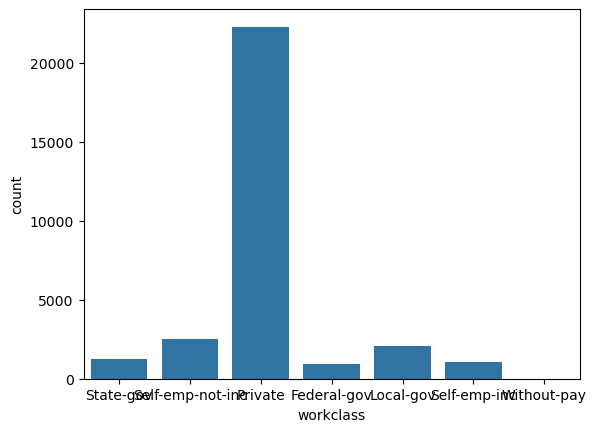

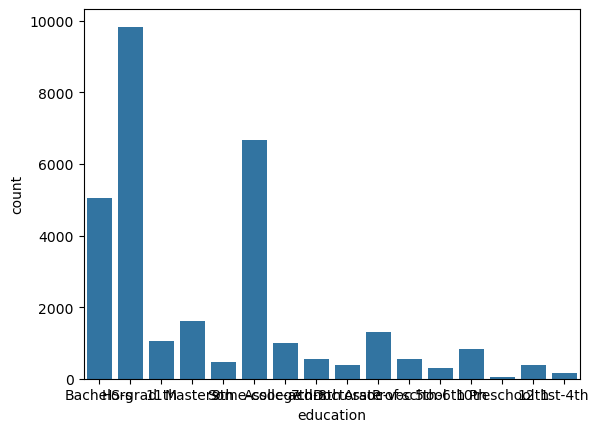

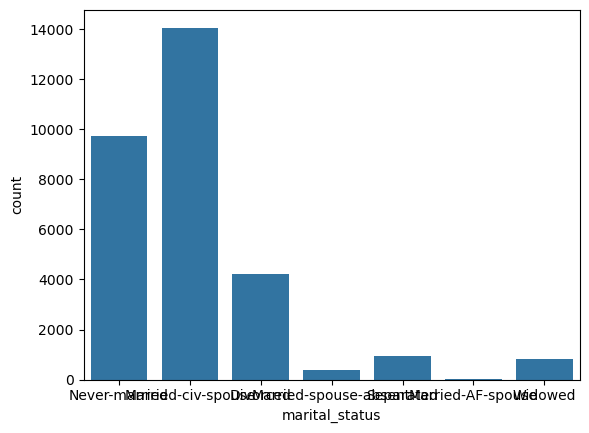

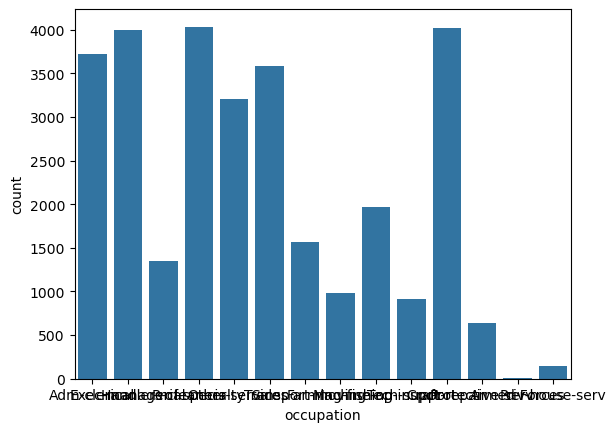

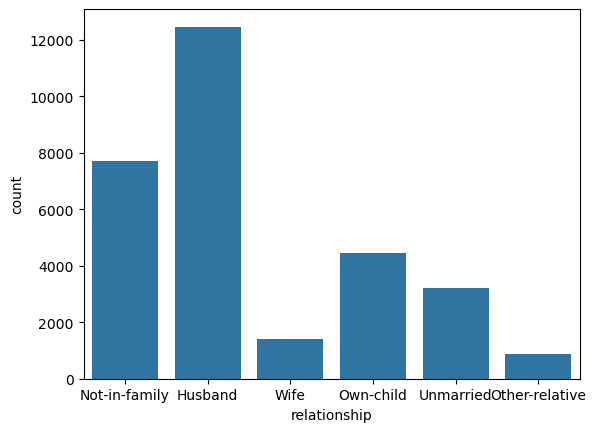

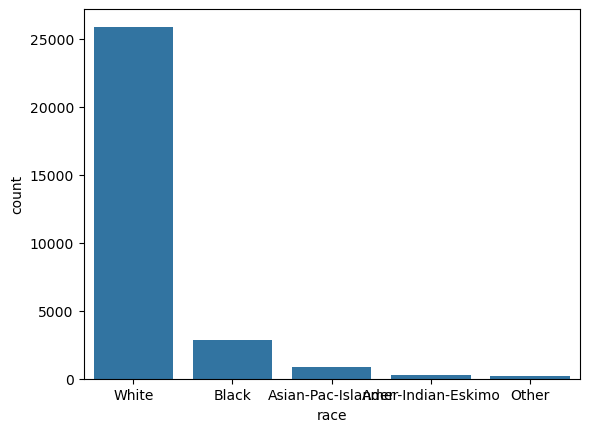

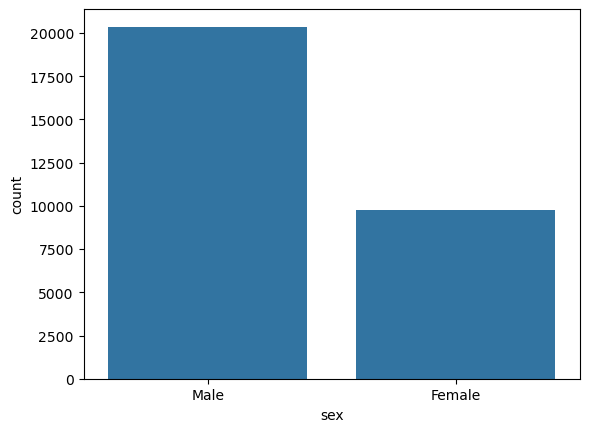

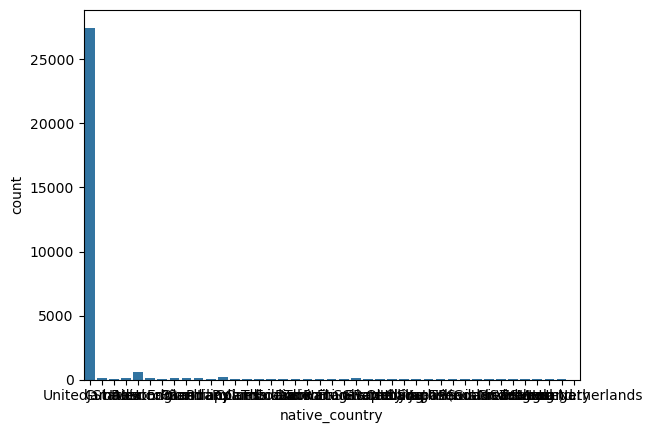

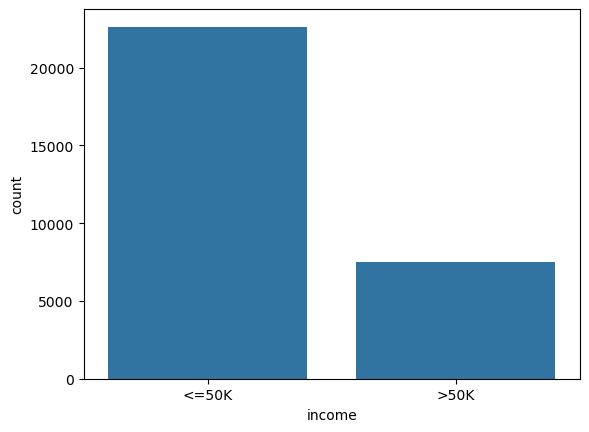

In [15]:
for col in df.select_dtypes('object').columns :
    
    plt.figure()
    sns.countplot(data = df , x = col)
    

- Convert salary to integer

In [16]:
df['income']=df['income'].map({'<=50K': 0, '>50K': 1})

<Axes: >

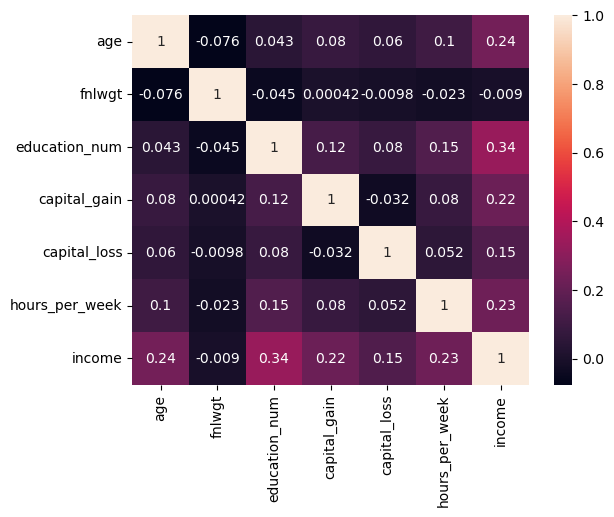

In [17]:
sns.heatmap(df.select_dtypes('number').corr() , annot=True )

## univariate and bivariate analysis

- Deal with fnlwgt column 

- I do not understand this column and there is no strong correlation with target column (income) so i dropped it 

In [18]:
df.drop("fnlwgt", axis=1 , inplace=True)

In [19]:
df.reset_index(drop=True, inplace=True)

- Deal with country column 

In [20]:
df.native_country.unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', 'Mexico',
       'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran',
       'Philippines', 'Poland', 'Columbia', 'Cambodia', 'Thailand',
       'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'Italy', 'China', 'South', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [21]:
df.native_country.value_counts()

native_country
United-States                 27487
Mexico                          606
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
El-Salvador                     100
India                           100
Cuba                             92
England                          86
Jamaica                          80
South                            71
Italy                            68
China                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        61
Japan                            59
Columbia                         56
Poland                           56
Haiti                            42
Iran                             42
Taiwan                           42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                           29
France       

- Visualize the original top 15 country distribution

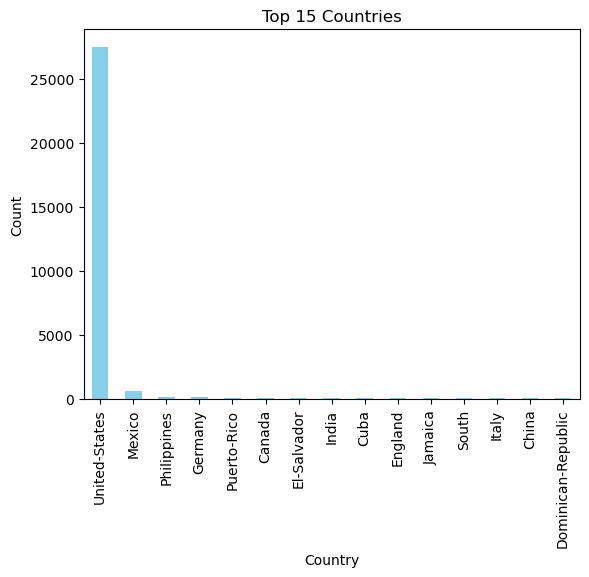

In [22]:
df['native_country'].value_counts().head(15).plot(kind='bar', color='skyblue')
plt.title('Top 15 Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

In [23]:
df[['native_country','income']].groupby(['native_country']).mean()

,income
native_country,
Cambodia,0.388889
Canada,0.336449
China,0.294118
Columbia,0.035714
Cuba,0.271739
Dominican-Republic,0.029851
Ecuador,0.148148
El-Salvador,0.090000
England,0.348837


- Each number in our output represents: What fraction of people in that country earn more than 50K per year

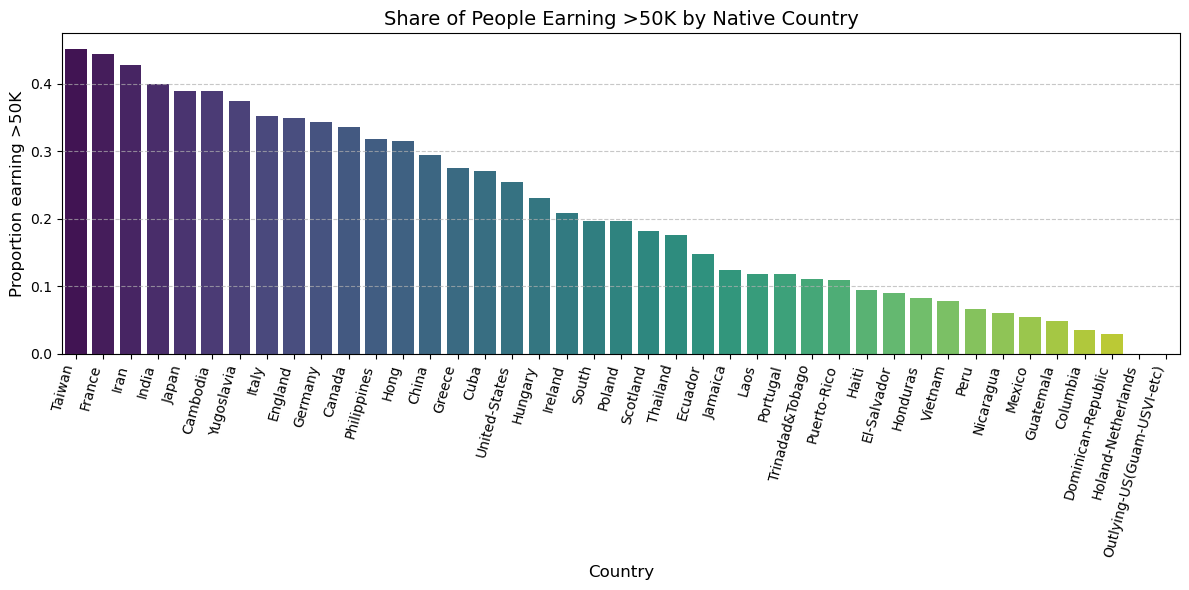

In [24]:
income_by_country = df.groupby('native_country')['income'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=income_by_country.index, y=income_by_country.values, palette='viridis')

plt.title('Share of People Earning >50K by Native Country', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Proportion earning >50K', fontsize=12)
plt.xticks(rotation=75, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- Simplify 'native_country' into two categories: 'United-States' and 'Non-United-States'

In [25]:
df['native_country'] = df['native_country'].apply(
    lambda x: 'United-States' if x == 'United-States' else 'Non-United-States'
)

- Visualize the new simplified distribution

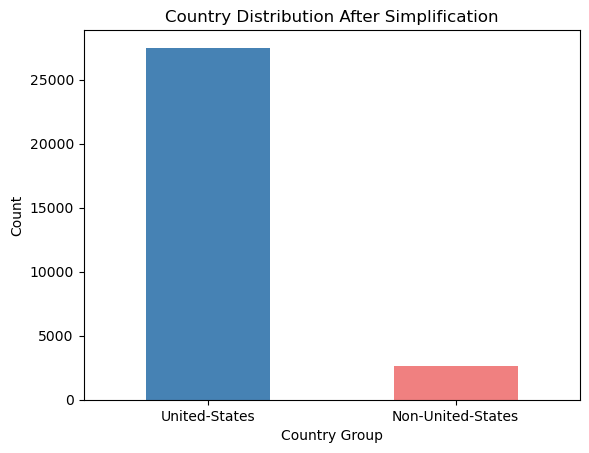

In [26]:
df['native_country'].value_counts().plot(kind='bar', color=['steelblue', 'lightcoral'])
plt.title('Country Distribution After Simplification')
plt.xlabel('Country Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

- Deal with race column 

In [27]:
df.race.value_counts()

race
White                 25912
Black                  2816
Asian-Pac-Islander      894
Amer-Indian-Eskimo      286
Other                   231
Name: count, dtype: int64

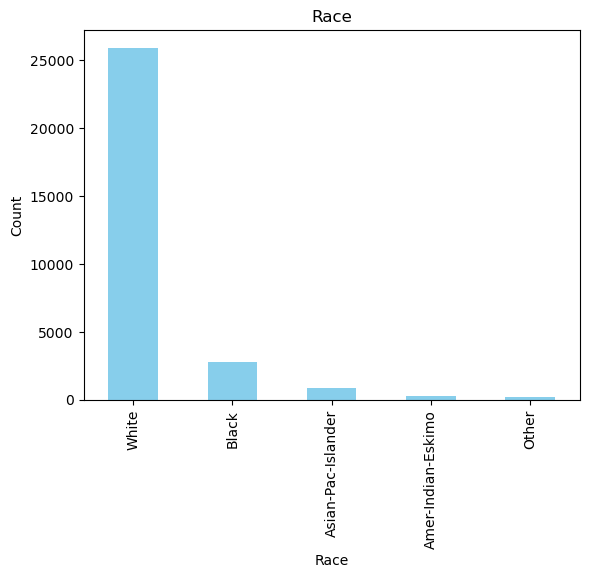

In [28]:
df['race'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

In [29]:
df[['race','income']].groupby('race').mean()

,income
race,
Amer-Indian-Eskimo,0.118881
Asian-Pac-Islander,0.277405
Black,0.129972
Other,0.090909
White,0.263855


In [30]:
df["race"].replace(["Asian-Pac-Islander", "Amer-Indian-Eskimo", "Other"],"Others", inplace = True)

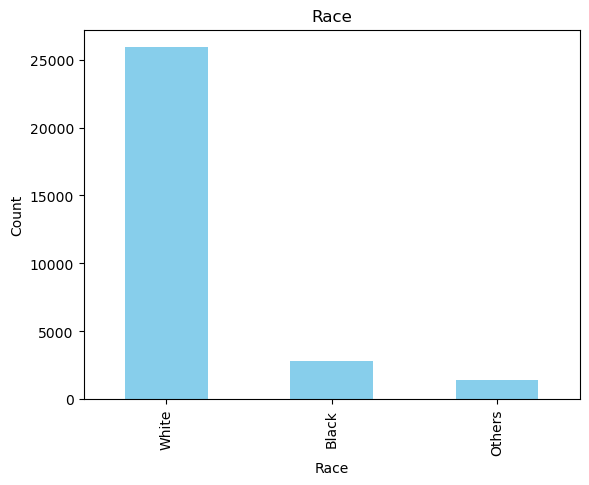

In [31]:
df['race'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

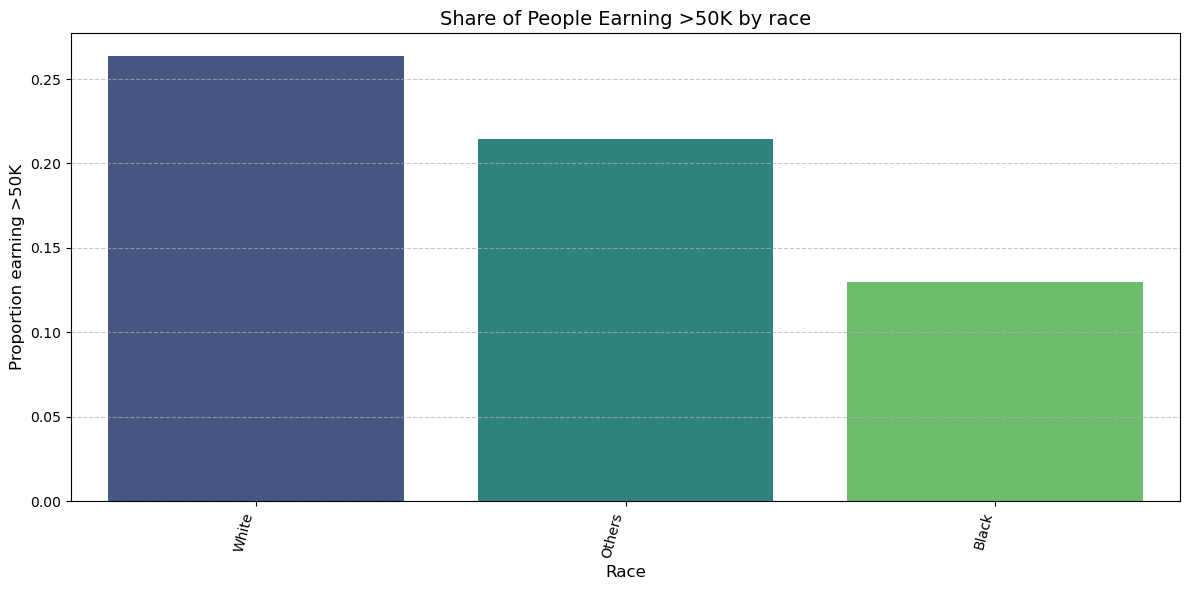

In [32]:
income_by_country = df.groupby('race')['income'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=income_by_country.index, y=income_by_country.values, palette='viridis')

plt.title('Share of People Earning >50K by race', fontsize=14)
plt.xlabel('Race', fontsize=12)
plt.ylabel('Proportion earning >50K', fontsize=12)
plt.xticks(rotation=75, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- I noticed that : 
- Asian-Pac-Islander individuals have the highest proportion of high-income earners (about 28%)
- White individuals also have a relatively high rate (~26%)
- Black, Amer-Indian-Eskimo, and Other have lower high-income rates (9–13%)


- Deal with hours_per_week column 

<Axes: xlabel='hours_per_week', ylabel='Density'>

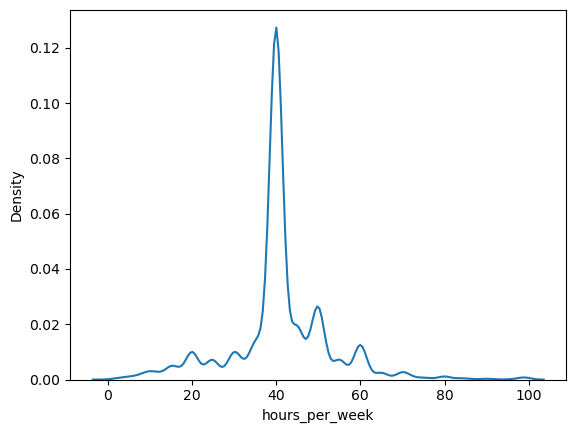

In [33]:
sns.kdeplot(x = df['hours_per_week'])

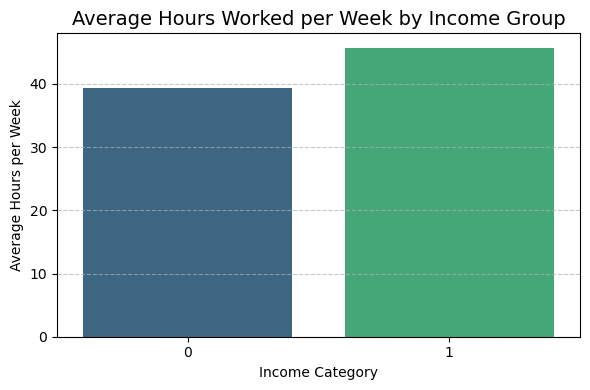

In [34]:
mean_hours = df.groupby('income')['hours_per_week'].mean()

plt.figure(figsize=(6,4))
sns.barplot(x=mean_hours.index, y=mean_hours.values, palette='viridis')

plt.title('Average Hours Worked per Week by Income Group', fontsize=14)
plt.xlabel('Income Category')
plt.ylabel('Average Hours per Week')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


- This suggests a positive correlation between working hours and income
- This fits well with real world logic individuals with higher paying jobs often: Work longer hours or have more responsibilities or hold positions that require extra time commitment

- Deal with marital status column 

In [35]:
df.marital_status.value_counts()

marital_status
Married-civ-spouse       14059
Never-married             9711
Divorced                  4212
Separated                  939
Widowed                    827
Married-spouse-absent      370
Married-AF-spouse           21
Name: count, dtype: int64

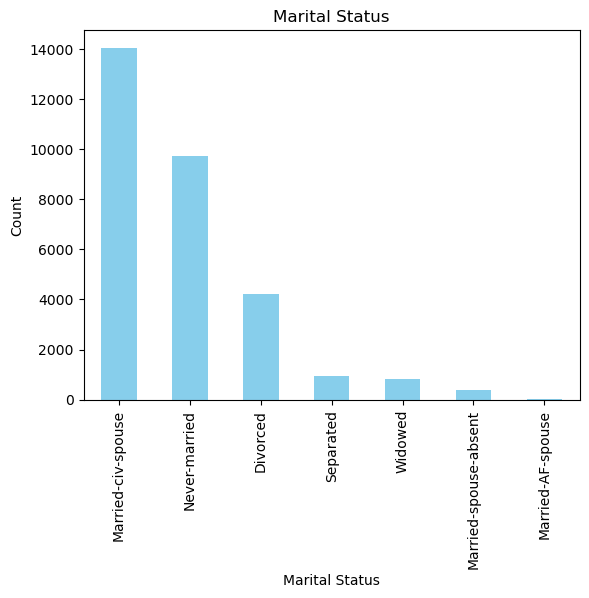

In [36]:
df['marital_status'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

- Married-civ-spouse :  Married, civilian spouse (not in the military). The most common marriage type — a standard civilian marriage recognized by law

- Never-married : Person has never been married

- Divorced : Previously married, now legally divorced

- Separated : Still legally married, but living apart (not divorced yet)

- Widowed : Spouse has died and the person has not remarried

- Married-spouse-absent : Person is married but the spouse is not living at home (e.g., long-term absence)

- Married-AF-spouse : Married to a spouse in the Armed Forces (military)

In [37]:
df[['marital_status','income']].groupby(['marital_status']).mean()

,income
marital_status,
Divorced,0.107312
Married-AF-spouse,0.476190
Married-civ-spouse,0.455011
Married-spouse-absent,0.083784
Never-married,0.048399
Separated,0.070288
Widowed,0.096735


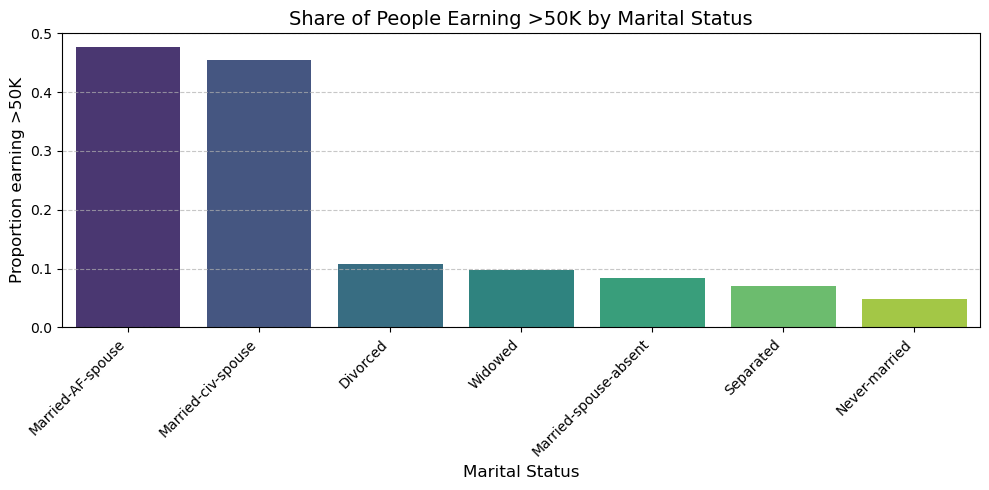

In [38]:
income_by_marital = df.groupby('marital_status')['income'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=income_by_marital.index, y=income_by_marital.values, palette='viridis')

plt.title('Share of People Earning >50K by Marital Status', fontsize=14)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Proportion earning >50K', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- Deal with relationship column 

In [39]:
df.relationship.value_counts()

relationship
Husband           12457
Not-in-family      7714
Own-child          4462
Unmarried          3211
Wife               1406
Other-relative      889
Name: count, dtype: int64

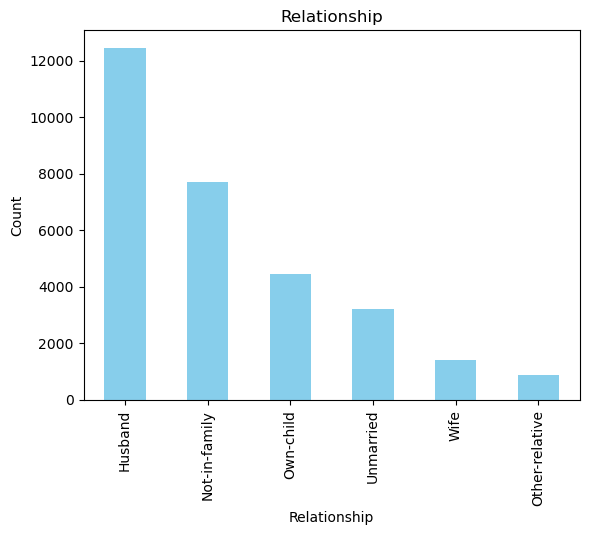

In [40]:
df['relationship'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Relationship')
plt.xlabel('Relationship')
plt.ylabel('Count')
plt.show()

In [41]:
df[['relationship','income']].groupby(['relationship']).mean()

,income
relationship,
Husband,0.455728
Not-in-family,0.106689
Other-relative,0.039370
Own-child,0.014343
Unmarried,0.066334
Wife,0.493599


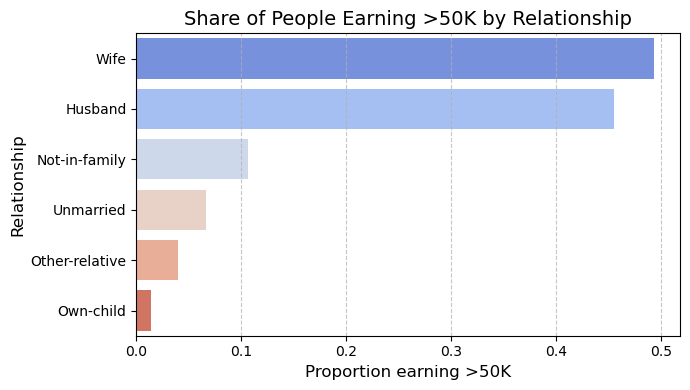

In [42]:
income_by_relationship = (
    df.groupby('relationship')['income']
      .mean()
      .sort_values(ascending=False)
)

plt.figure(figsize=(7, 4))
sns.barplot(y=income_by_relationship.index, x=income_by_relationship.values, palette='coolwarm')
plt.title('Share of People Earning >50K by Relationship', fontsize=14)
plt.xlabel('Proportion earning >50K', fontsize=12)
plt.ylabel('Relationship', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


- I want to check if the values in relationship logically match the values in marital_status

In [43]:
cross_tab = pd.crosstab(df['relationship'], df['marital_status'])
cross_tab

marital_status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
relationship,,,,,,,
Husband,0,9,12448,0,0,0,0
Not-in-family,2267,0,14,181,4437,383,432
Other-relative,103,1,118,26,548,53,40
Own-child,308,1,83,43,3925,90,12
Unmarried,1534,0,0,120,801,413,343
Wife,0,10,1396,0,0,0,0


- relationship : This column describes how the person relates to the “head of the household. It’s not about their social life in general it’s about their role inside the family unit recorded in the census.

- marital_status : This describes the person’s legal marital situation not their household role.

- I see that “Unmarried + Married-spouse-absent” reflects a logical mismatch between relationship and marital status.
- Also “Own-child + Married” may represent young adults living with their parents or result from data entry errors.

In [44]:
condition1 = (df['relationship'] == 'Own-child') & (
    df['marital_status'].isin(['Married-civ-spouse', 'Married-AF-spouse', 'Married-spouse-absent'])
)

condition2 = (df['relationship'] == 'Unmarried') & (
    df['marital_status'] == 'Married-spouse-absent'
)

unusual_combos = df[condition1 | condition2]

print(f"Found {unusual_combos.shape[0]} rows with unusual combinations.")
unusual_combos[['relationship', 'marital_status', 'age', 'sex', 'education', 'hours_per_week', 'income']]


Found 247 rows with unusual combinations.


,relationship,marital_status,age,sex,education,hours_per_week,income
31,Own-child,Married-civ-spouse,30,Male,Some-college,40,0
162,Unmarried,Married-spouse-absent,27,Female,HS-grad,25,0
428,Unmarried,Married-spouse-absent,50,Male,1st-4th,40,0
447,Unmarried,Married-spouse-absent,41,Female,HS-grad,40,0
448,Own-child,Married-spouse-absent,25,Female,Some-college,20,0
...,...,...,...,...,...,...,...
29824,Own-child,Married-civ-spouse,28,Male,HS-grad,40,0
29872,Unmarried,Married-spouse-absent,37,Female,Assoc-voc,32,0
29910,Unmarried,Married-spouse-absent,34,Male,12th,35,0
30031,Own-child,Married-spouse-absent,30,Male,Some-college,60,1


In [45]:
unusual_summary = unusual_combos.groupby(['relationship', 'marital_status']).size()
unusual_summary


relationship  marital_status       
Own-child     Married-AF-spouse          1
              Married-civ-spouse        83
              Married-spouse-absent     43
Unmarried     Married-spouse-absent    120
dtype: int64

In [46]:
invalid_mask = condition1 | condition2

In [47]:
df = df[~invalid_mask].copy()

In [48]:
check = df[
    ((df['relationship'] == 'Own-child') &
     (df['marital_status'].isin(['Married-civ-spouse', 'Married-AF-spouse', 'Married-spouse-absent'])))
    |
    ((df['relationship'] == 'Unmarried') &
     (df['marital_status'] == 'Married-spouse-absent'))
]

print(f"Unusual combinations: {check.shape[0]}")

Unusual combinations: 0


In [49]:
df.reset_index(drop=True, inplace=True)

In [50]:
df[['marital_status','relationship','income']].groupby(['marital_status','relationship']).mean()

income
marital_status        relationship            
Divorced              Not-in-family   0.132775
                      Other-relative  0.048544
                      Own-child       0.045455
                      Unmarried       0.086050
Married-AF-spouse     Husband         0.444444
                      Other-relative  0.000000
                      Wife            0.600000
Married-civ-spouse    Husband         0.455736
                      Not-in-family   0.285714
                      Other-relative  0.144068
                      Wife            0.492837
Married-spouse-absent Not-in-family   0.121547
                      Other-relative  0.076923
Never-married         Not-in-family   0.091729
                      Other-relative  0.014599
                      Own-child       0.008408
                      Unmarried       0.027466
Separated             Not-in-family   0.117493
                      Other-relative  0.037736
                      Own-child       0.000000
                      Unmarried       0.046005
Widowed               Not-in-family   0.101852
                      Other-relative  0.025000
                      Own-child       0.000000
                      Unmarried       0.102041

In [51]:
df["marital_status"] = df["marital_status"].replace({
    "Married-civ-spouse": "Married",
    "Married-spouse-absent": "Married",
    "Married-AF-spouse": "Married",
    "Separated": "Married",
    "Never-married": "Single",
    "Divorced": "Single",
    "Widowed": "Single"
})

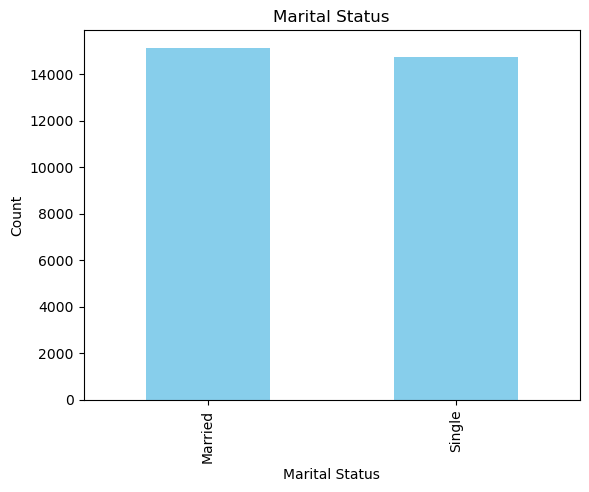

In [52]:
df['marital_status'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

- Deal with workclass column 

In [53]:
df.workclass.value_counts()

workclass
Private             22065
Self-emp-not-inc     2486
Local-gov            2054
State-gov            1265
Self-emp-inc         1072
Federal-gov           938
Without-pay            12
Name: count, dtype: int64

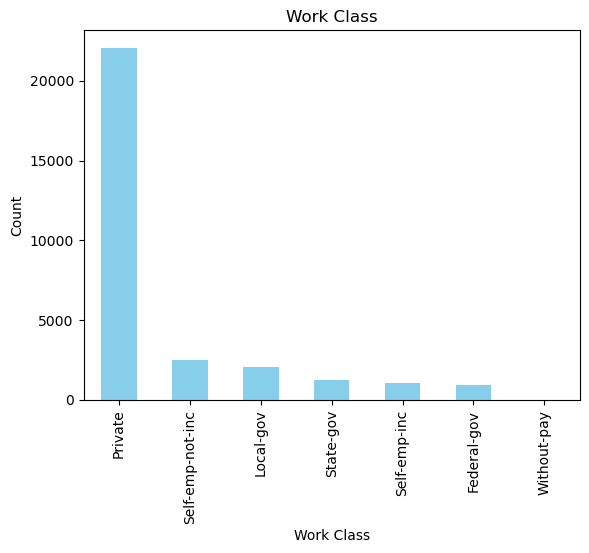

In [54]:
df['workclass'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Work Class')
plt.xlabel('Work Class')
plt.ylabel('Count')
plt.show()

In [55]:
df[['workclass','income']].groupby('workclass').mean()

,income
workclass,
Federal-gov,0.389126
Local-gov,0.296495
Private,0.220213
Self-emp-inc,0.557836
Self-emp-not-inc,0.286002
State-gov,0.270356
Without-pay,0.000000


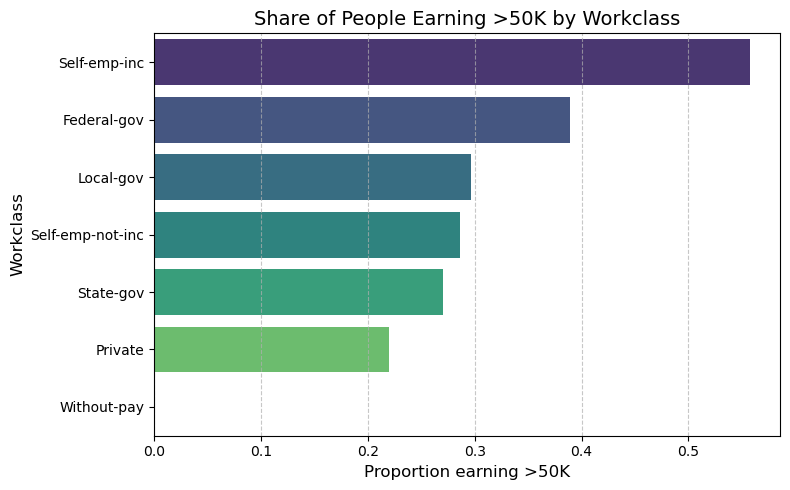

In [56]:
income_by_workclass = (
    df.groupby('workclass')['income']
      .mean()
      .sort_values(ascending=False)
)

plt.figure(figsize=(8, 5))
sns.barplot(y=income_by_workclass.index, x=income_by_workclass.values, palette='viridis')
plt.title('Share of People Earning >50K by Workclass', fontsize=14)
plt.xlabel('Proportion earning >50K', fontsize=12)
plt.ylabel('Workclass', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


- Deal with education column 

- columns education and education_num are the same so we will drop education_num and encode the education column

In [57]:
df.drop("education_num" , axis=1, inplace=True)

In [58]:
df.reset_index(drop=True, inplace=True)

In [59]:
df.education.value_counts()

education
HS-grad         9748
Some-college    6610
Bachelors       5016
Masters         1624
Assoc-voc       1298
11th            1035
Assoc-acdm      1001
10th             810
7th-8th          549
Prof-school      541
9th              450
Doctorate        372
12th             372
5th-6th          279
1st-4th          144
Preschool         43
Name: count, dtype: int64

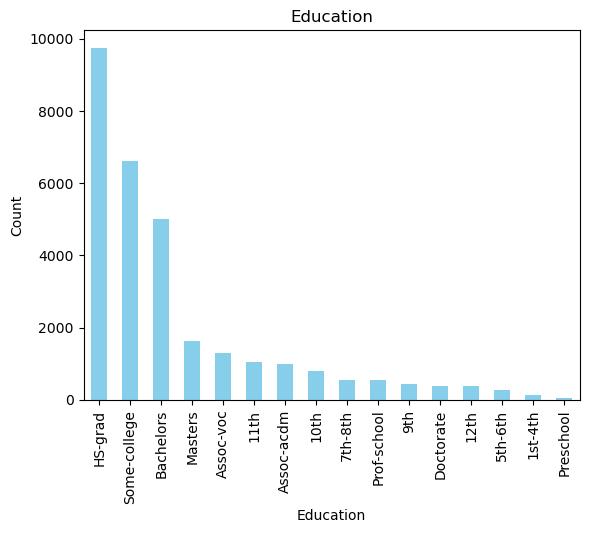

In [60]:
df['education'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

In [61]:
df[['education','income']].groupby(['education']).mean()

,income
education,
10th,0.071605
11th,0.057005
12th,0.077957
1st-4th,0.041667
5th-6th,0.043011
7th-8th,0.063752
9th,0.053333
Assoc-acdm,0.255744
Assoc-voc,0.264253


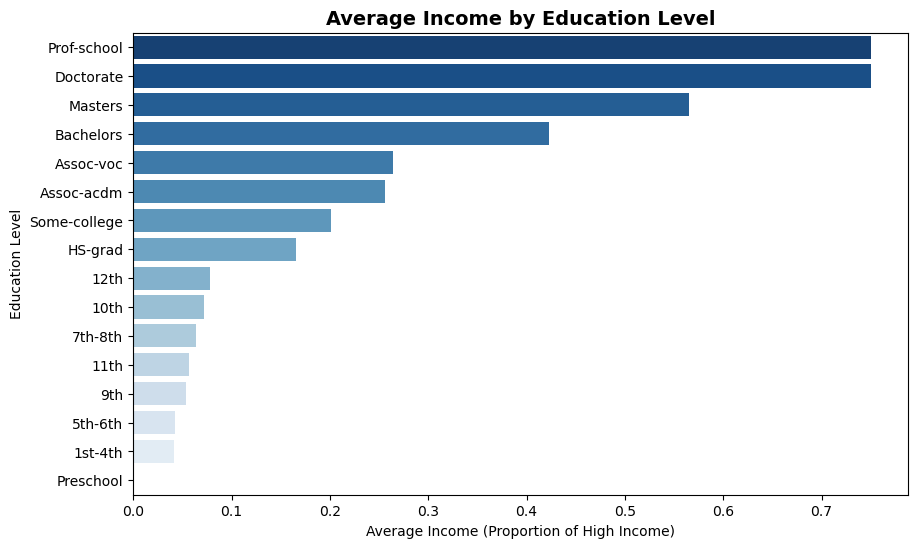

In [62]:
edu_income = df[['education','income']].groupby('education').mean().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='income', y='education', data=edu_income.sort_values('income', ascending=False), palette='Blues_r')
plt.xlabel('Average Income (Proportion of High Income)')
plt.ylabel('Education Level')
plt.title('Average Income by Education Level', fontsize=14, weight='bold')
plt.show()


- Deal with occupation column 

In [63]:
df.occupation.value_counts()

occupation
Prof-specialty       4019
Craft-repair         4002
Exec-managerial      3972
Adm-clerical         3671
Sales                3549
Other-service        3170
Machine-op-inspct    1946
Transport-moving     1562
Handlers-cleaners    1330
Farming-fishing       974
Tech-support          907
Protective-serv       641
Priv-house-serv       140
Armed-Forces            9
Name: count, dtype: int64

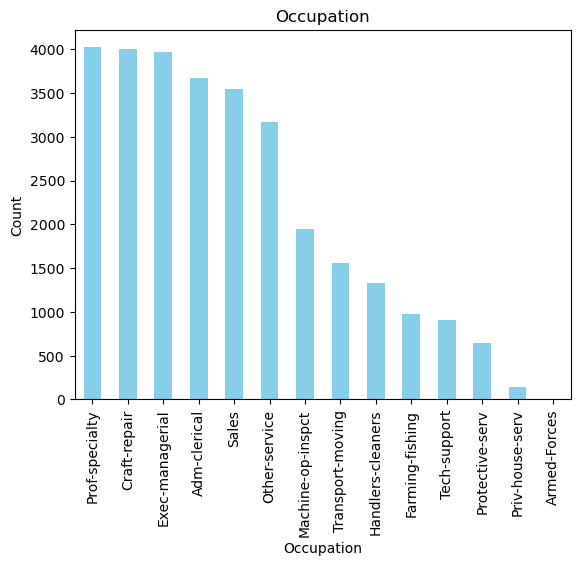

In [64]:
df['occupation'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()

In [65]:
df[['occupation','income']].groupby(['occupation']).mean()

,income
occupation,
Adm-clerical,0.135385
Armed-Forces,0.111111
Craft-repair,0.225887
Exec-managerial,0.486908
Farming-fishing,0.118070
Handlers-cleaners,0.061654
Machine-op-inspct,0.125385
Other-service,0.041009
Priv-house-serv,0.007143


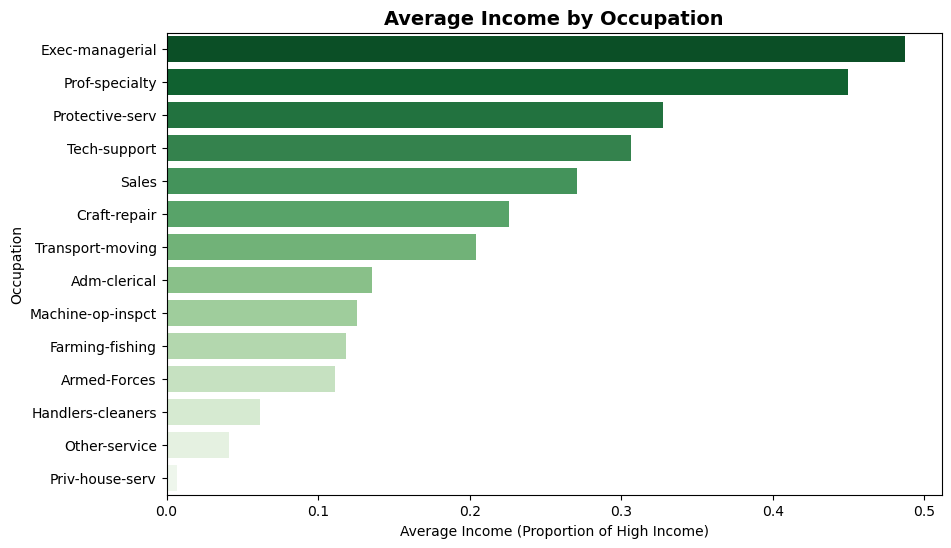

In [66]:
occ_income = df[['occupation','income']].groupby('occupation').mean().reset_index()
occ_income = occ_income.sort_values('income', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(
    x='income', y='occupation',
    data=occ_income,
    palette='Greens_r'
)
plt.xlabel('Average Income (Proportion of High Income)')
plt.ylabel('Occupation')
plt.title('Average Income by Occupation', fontsize=14, weight='bold')
plt.show()


- "capital_gain" & "capital_loss" Columns

In [67]:
df.capital_gain.unique()

array([ 2174,     0, 14084,  5178,  5013,  2407, 14344, 15024,  7688,
        4064,  4386,  7298,  1409,  3674,  1055,  2050,  2176,   594,
       20051,  6849,  4101,  8614,  3411,  2597, 25236,  4650,  2463,
        3103, 10605,  2964,  3325,  2580,  3471,  4865, 99999,  6514,
        1471,  2329,  2105,  2885, 10520,  2202,  2961, 27828,  6767,
        2228,  1506, 13550,  2635,  5556,  4787,  3781,  3137,  3818,
         914,   401,  2829,  2977,  4934,  2062,  2354,  3464,  5455,
       15020,  1424,  3273, 22040,  4416, 10566,  4931,  7430, 34095,
        6497,  3908,   114,  2346,  2907,  1151,  9386,  2414,  2290,
        3418, 15831, 41310,  4508,  2538,  3456,  1848,  3887,  7896,
        5721,  9562,  6418,  1455,  2036,  3942,  1831, 11678,  2936,
        2993,  7443,  6360,  4687,  1797,  6723,  2009,  3432,  6097,
        1639,  2653, 18481, 25124,  7978,   991,  1173,  2387,  5060,
        1086])

In [68]:
df.capital_gain.value_counts()

capital_gain
0        27369
15024      337
7688       269
7298       238
99999      148
         ...  
7978         1
1173         1
2387         1
5060         1
1086         1
Name: count, Length: 118, dtype: int64

<Axes: xlabel='capital_gain', ylabel='Density'>

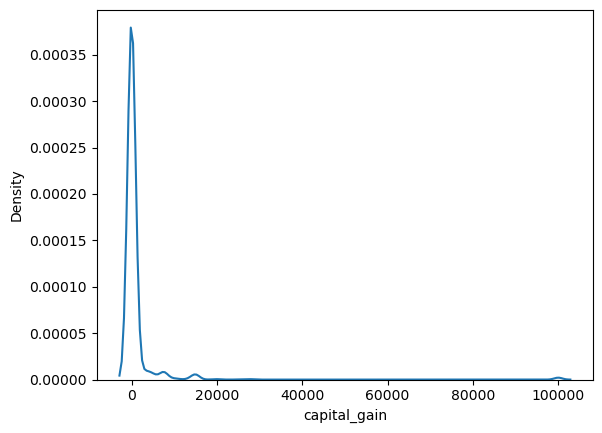

In [69]:
sns.kdeplot(x = df['capital_gain'])

In [70]:
df.capital_loss.unique()

array([   0, 2042, 1408, 1902, 1887, 1719, 1762, 1564, 2179, 1816, 1980,
       1977, 1876, 1340, 2206, 1741, 1485, 2339, 2415, 1721, 1380, 2051,
       2377, 1669, 2352, 1672,  653, 2392, 1504, 1590, 1651, 1628, 1848,
       2001, 1740, 2002, 1579, 2258, 1602, 2547, 2205, 1726, 2444, 1138,
       2238,  625,  213, 1539,  880, 1668, 1092, 1594, 2231, 1844,  810,
       2824, 2559, 2057, 1573, 1974,  974, 2174, 2149, 1735, 1258, 2603,
       2282,  323, 2246, 1617, 1648, 1825, 3770, 1755, 3683, 4356, 2267,
       2080, 2457,  419,  155, 3900, 2201, 1944, 2129, 2467, 2754, 3004,
       1411])

In [71]:
df.capital_loss.value_counts()

capital_loss
0       28473
1902      194
1977      162
1887      155
1848       50
        ...  
2201        1
2129        1
2467        1
3004        1
1411        1
Name: count, Length: 89, dtype: int64

<Axes: xlabel='capital_loss', ylabel='Density'>

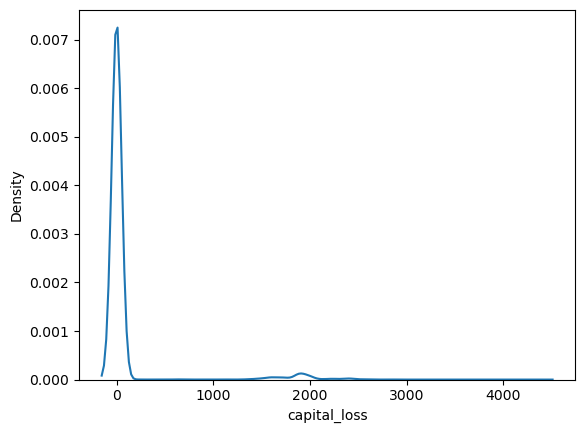

In [72]:
sns.kdeplot(x = df['capital_loss'])

- I tried to handle this skewness using log1p (because there is Zero in this column so we use log1p instead of log) but our column (capital_gain or capital_loss) has a lot of zeros (which is true in the Adult Income data) then applying a log or log1p doesn’t change much.

In [73]:
df["net_capital"] = df["capital_gain"] - df["capital_loss"]
df['net_capital'] = pd.cut(df['net_capital'], bins = [-5000, 5000, 100000], labels = ['Low', 'High'])
df['net_capital'] = df['net_capital'].astype('object')


In [74]:
df.drop( ["capital_gain" , "capital_loss"] , axis=1 , inplace=True)

In [75]:
df.reset_index(drop=True, inplace=True)

In [76]:
df

,age,workclass,education,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income,net_capital
0,39,State-gov,Bachelors,Single,Adm-clerical,Not-in-family,White,Male,40,United-States,0,Low
1,50,Self-emp-not-inc,Bachelors,Married,Exec-managerial,Husband,White,Male,13,United-States,0,Low
2,38,Private,HS-grad,Single,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0,Low
3,53,Private,11th,Married,Handlers-cleaners,Husband,Black,Male,40,United-States,0,Low
4,28,Private,Bachelors,Married,Prof-specialty,Wife,Black,Female,40,Non-United-States,0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
29887,27,Private,Assoc-acdm,Married,Tech-support,Wife,White,Female,38,United-States,0,Low
29888,40,Private,HS-grad,Married,Machine-op-inspct,Husband,White,Male,40,United-States,1,Low
29889,58,Private,HS-grad,Single,Adm-clerical,Unmarried,White,Female,40,United-States,0,Low
29890,22,Private,HS-grad,Single,Adm-clerical,Own-child,White,Male,20,United-States,0,Low


### Export Data

In [77]:
df.to_pickle(EXPORT_PATH)